# CaseStudy_Week15

## Dataset used : mushrooms.csv

#### Problem Statement :
#### To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset. 
#### (Along with other ML algorithms, Naïve Bayes’ Classifier should be applied) 
#### Also, if some data pre-processing is necessary do that as well.

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the datset to python environment

In [2]:
df = pd.read_csv(r'C:\Users\deepthi777\Documents\My World of Learning\ICTAK\Week_15\CaseStudy\mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

#### The given dataset contains 8124 rows and 23 columns.

## Attribute Information: (classes: edible=e, poisonous=p)
#### cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
#### cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
#### cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
#### bruises: bruises=t,no=f
#### odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
#### gill-attachment: attached=a,descending=d,free=f,notched=n
#### gill-spacing: close=c,crowded=w,distant=d
#### gill-size: broad=b,narrow=n
#### gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
#### stalk-shape: enlarging=e,tapering=t
#### stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
#### stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
#### stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
#### stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
#### stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
#### veil-type: partial=p,universal=u
#### veil-color: brown=n,orange=o,white=w,yellow=y
#### ring-number: none=n,one=o,two=t
#### ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
#### spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
#### population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
#### habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

## EDA and Pre - Processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
# checking for missing/null values

df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### There are no null values in the given dataset.

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


[]

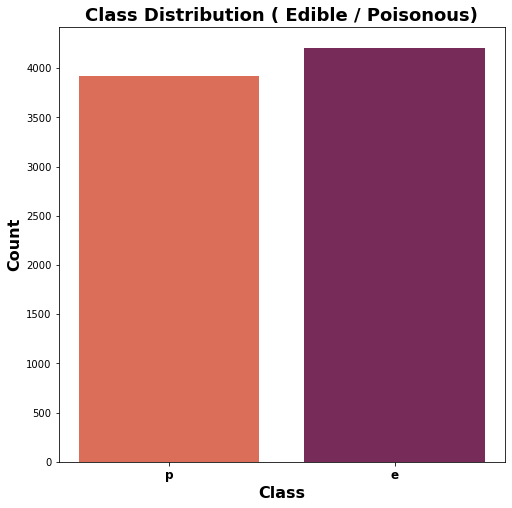

In [7]:
plt.figure(figsize=(8,8))

sns.countplot(x='class' , data=df , alpha=1 , linewidth=1.25 , palette='rocket_r')
plt.title('Class Distribution ( Edible / Poisonous)' , fontweight='bold' , size=18)

plt.xlabel('Class' ,fontweight='bold' , size = 16)
plt.ylabel('Count' ,fontweight='bold' , size = 16)

plt.xticks(fontweight='bold' , size=12)

plt.plot()

#### The count of edible mushrooms are higher.

<Figure size 1008x432 with 0 Axes>

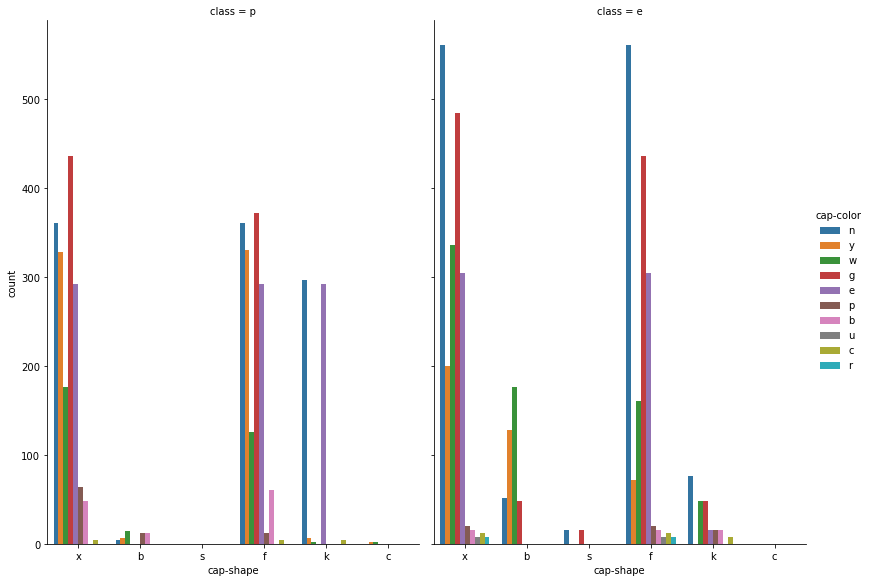

In [8]:
plt.figure(figsize = (14,6))
g = sns.catplot(x="cap-shape", hue="cap-color", col="class",
                data=df, kind="count",
                height=8, aspect=.7);

#### White Coloured Bell Shaped Mushrooms are highly recommended for eating.
#### Red Coloured Knobbed Shaped Mushrooms are poisonous.

<Figure size 1008x432 with 0 Axes>

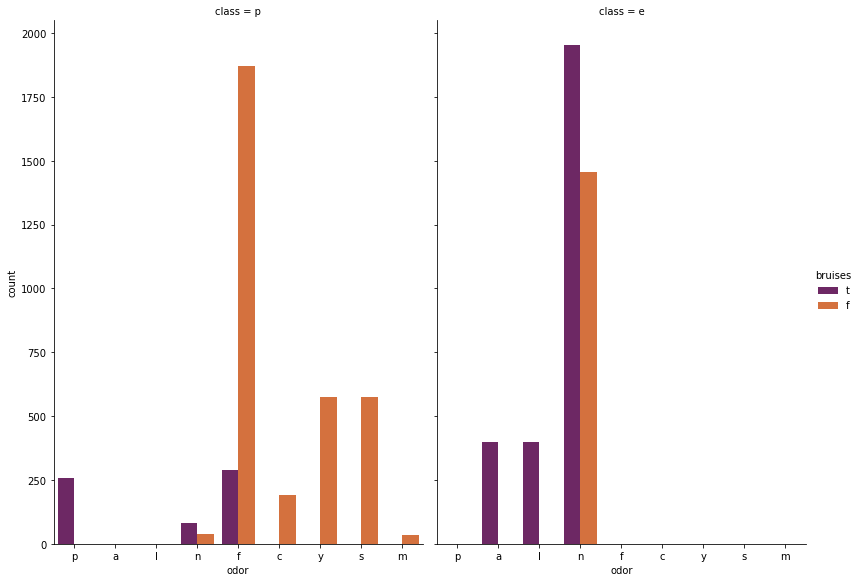

In [9]:
plt.figure(figsize = (14,6))
g = sns.catplot(x="odor", hue="bruises", col="class",
                data=df, kind="count",
                height=8, aspect=.7 , palette = 'inferno');

#### Odourless Bruised Mushrooms are highly recommended for eating.
#### Fishy Odoured Non-Bruised Mushrooms are poisonous.

#### Feature Distributions

In [10]:
features = df.columns[1:].tolist()

print(features)

['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


<ipython-input-11-23ba6982d741>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


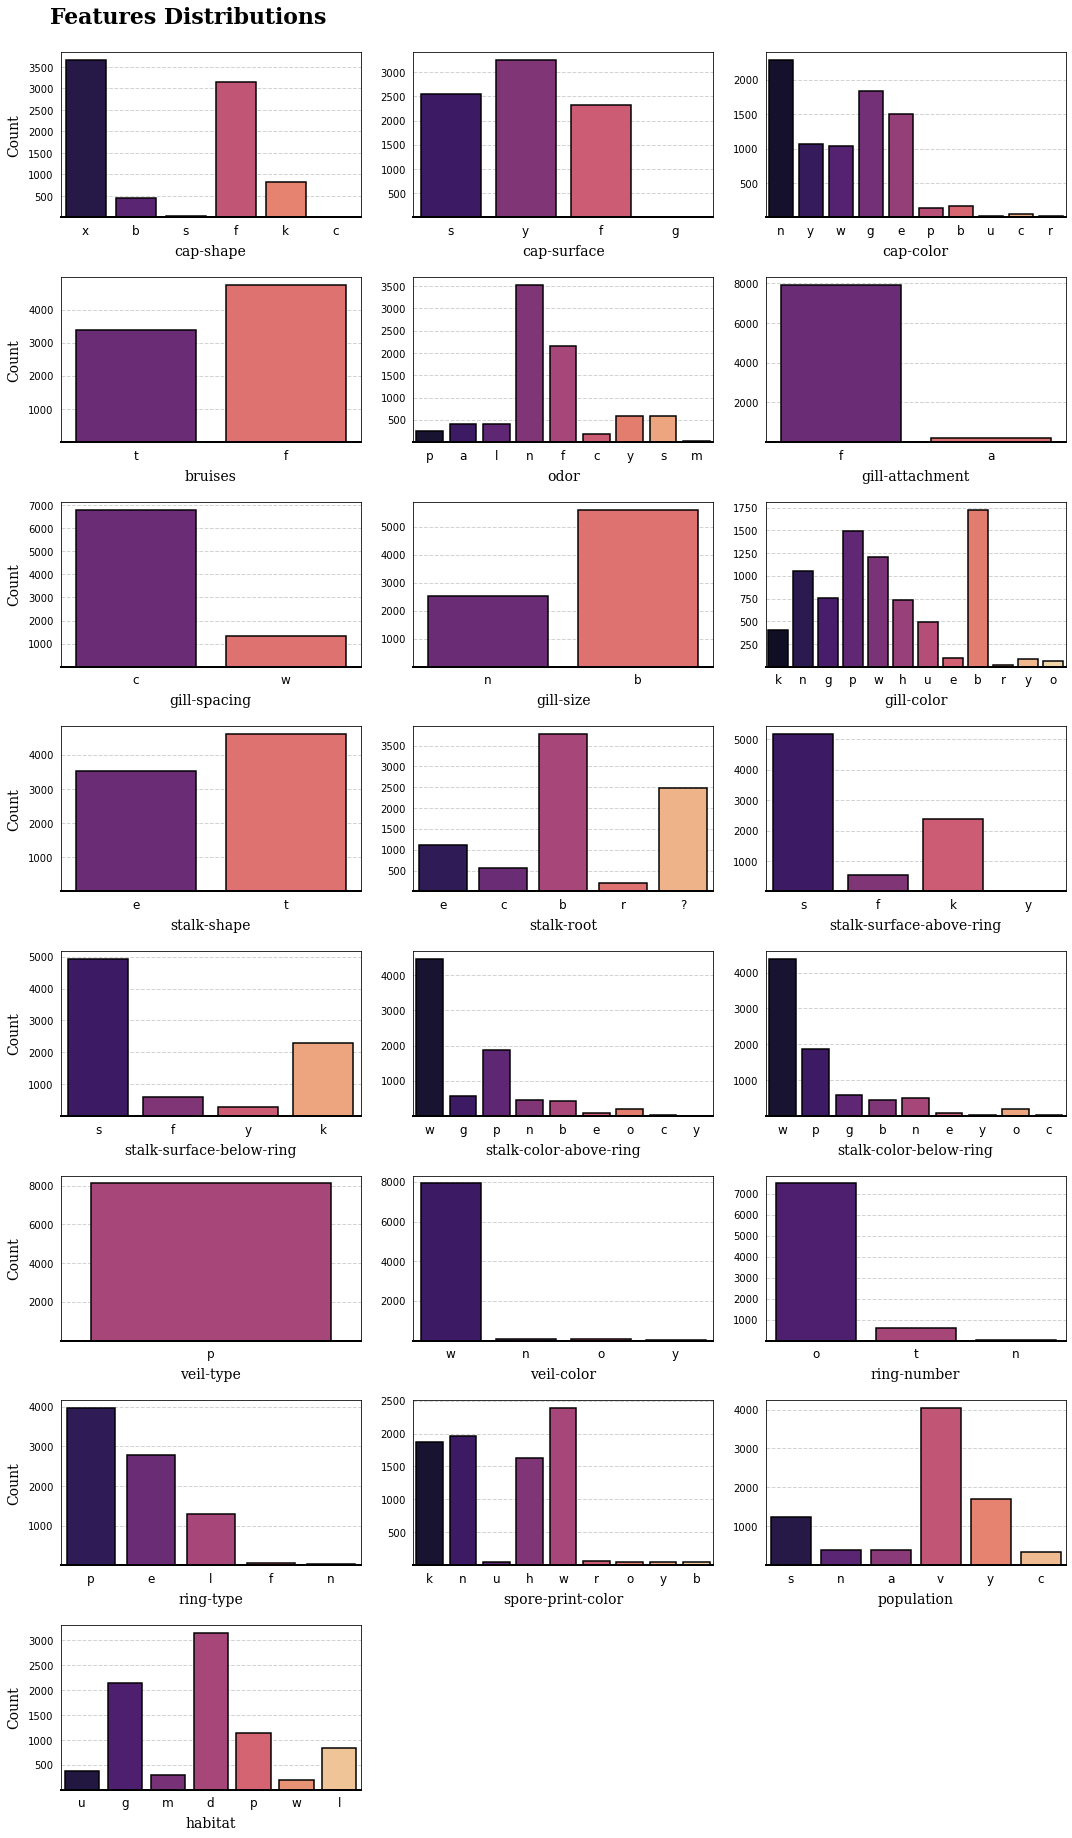

In [11]:
rows = 8
cols = 3
fig = plt.figure(figsize=(15, 25))
fig.set_facecolor("#fff")

for idx, feature in enumerate(features):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.set_facecolor("#fff")
    
    ax.grid(axis="y", linewidth=1, color="lightgrey", linestyle="--", zorder=0)
    sns.countplot(x=feature, palette='magma', data=df, ec="#000", alpha=1, linewidth=1.5, zorder=2)
    ax.xaxis.set_tick_params(size=0, labelsize=12, pad=7)
    ax.yaxis.set_tick_params(size=0, labelsize=10, pad=7)
    
    if idx % cols == 0:
        ax.set_ylabel("Count", fontsize=14, fontfamily="serif", labelpad=7)
    else:
        ax.set_ylabel("")
        
    ax.set_xlabel(feature, fontsize=14, fontfamily="serif", labelpad=7)
    ax.spines["bottom"].set(linewidth=2)
    ax.set_ylim(1)

fig.text(x=0.05, y=1.01, s="Features Distributions", fontsize=22, fontweight="bold", fontfamily="serif")
fig.tight_layout(w_pad=2, h_pad=1.5)
fig.show()

#### Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [13]:
for col in df.columns:
    df[col] = le.fit_transform(df[col])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


#### Heatmap

<AxesSubplot:>

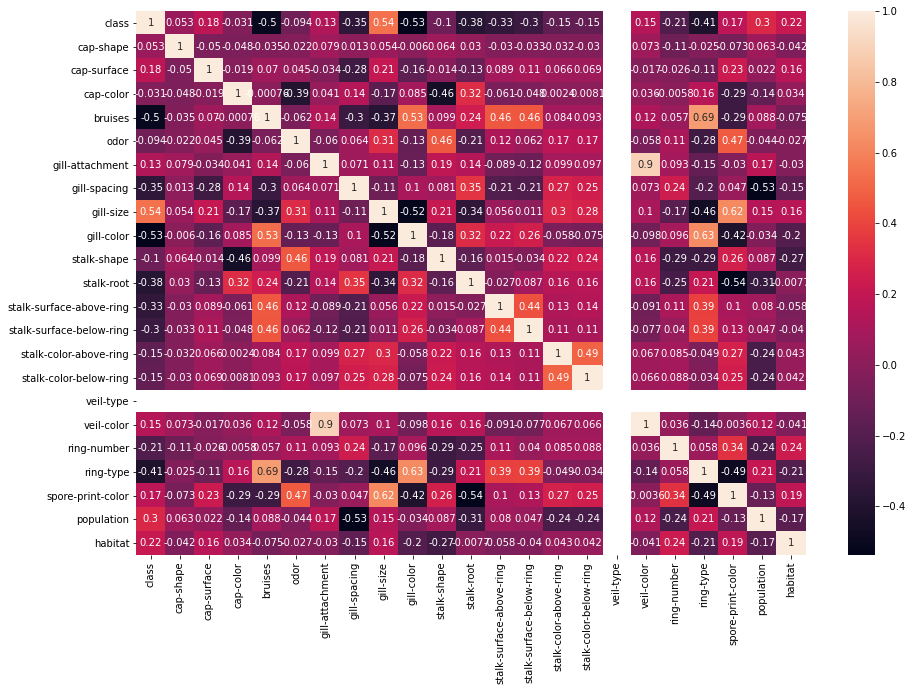

In [14]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True)

#### Performing Chi Square Test to remove irrelevant features

In [15]:
from sklearn.feature_selection import chi2

X = df.drop('class' , axis=1)
y = df['class']

chi_scores = chi2(X,y)

chi_scores

(array([1.75083640e+01, 2.14068544e+02, 1.15113816e+01, 1.19427735e+03,
        7.59101632e+01, 3.50544682e+00, 8.26795274e+02, 1.63660683e+03,
        5.95776447e+03, 3.65941055e+01, 1.18602922e+03, 2.22982400e+02,
        2.06648180e+02, 1.19792216e+02, 1.09789410e+02,            nan,
        5.12682568e+00, 2.56463352e+01, 1.95061015e+03, 3.79132729e+02,
        3.11766736e+02, 7.51309489e+02]),
 array([2.86046529e-005, 1.77936190e-048, 6.91713451e-004, 1.06903680e-261,
        2.96868171e-018, 6.11673438e-002, 8.06129280e-182, 0.00000000e+000,
        0.00000000e+000, 1.45470942e-009, 6.63061675e-260, 2.02239248e-050,
        7.39886855e-047, 7.02463813e-028, 1.08973983e-025,             nan,
        2.35587753e-002, 4.10073541e-007, 0.00000000e+000, 1.92211948e-084,
        9.00236554e-070, 2.08291637e-165]))

#### Here, first array represents chi square values and second array represnts p-values.

<AxesSubplot:>

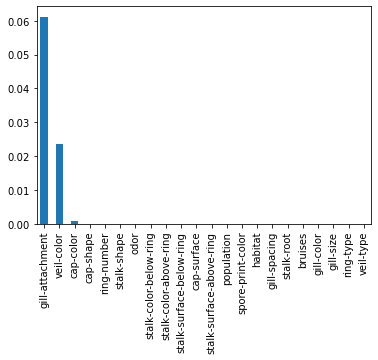

In [16]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

p_values.plot.bar()

In [17]:
X_cleaned = X.drop(['gill-attachment' , 'veil-color' , 'cap-color'] , axis=1)

## Insights :
#### As part of pre-processing, we have performed the below :
#### i) Checked for null values - no null values in the given dataset
#### ii) Lable Encoding - converted numerical variables to categorical variables
#### iii) Performed EDA - plotted Feature distributions, Heatmap etc to understand the data in a better way
#### iv) Feature reduction based on chi-square test

## Modelling

In [18]:
# Splitting the dataset into test and train

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X_cleaned, y, test_size = 0.3, random_state = 1)

#### Performing different classification models using GridSearchCV

In [19]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

In [20]:
model_params = {
    'SVM' : {
        'model' : svm.SVC(gamma='auto'),
        'params' : {
            'C' : [1,10,20],
            'kernel' : ['rbf', 'linear']
        }
    },
    'Random_Forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [1,5,10]
        }
    },
    'Logistic_Regression' : {
        'model' : LogisticRegression(solver='liblinear', multi_class='auto'),
        'params' : {
            'C' : [1,5,10]
        }
    }, 
    'Decision_Tree' : {
        'model' : DecisionTreeClassifier(random_state=42),
        'params' : {
            'max_depth': [2, 3, 5, 10, 20],
            'min_samples_leaf': [5, 10, 20, 50, 100],
            'criterion': ["gini", "entropy"]
        }
    },
    'kNN' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [5,7,9,11,13,15],
            'weights' : ['uniform','distance'],
            'metric' : ['minkowski','euclidean','manhattan']
        }
    }
}

In [21]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

In [22]:
df1 = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df1 = df1.style.set_properties(subset=['best_params'], **{'width-min': '300px'})
df1

,model,best_score,best_params
0,SVM,1.000000,"{'C': 10, 'kernel': 'rbf'}"
1,Random_Forest,1.000000,{'n_estimators': 5}
2,Logistic_Regression,0.935103,{'C': 1}
3,Decision_Tree,0.999648,"{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}"
4,kNN,1.000000,"{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}"


#### Naive Bayes Classifer

In [23]:
from sklearn.naive_bayes import GaussianNB as NB
classifier = NB()

classifier.fit(x_train,y_train)

NB_pred = classifier.predict(x_test)

In [24]:
print("Accuracy score for Naive Bayes Model is : ", accuracy_score(y_test , NB_pred))

Accuracy score for Naive Bayes Model is :  0.8978671041837571


#### Hyperparameter tuning for Naive Bayes Classifier

#### Var_smoothing (Variance smoothing) parameter specifies the portion of the largest variance of all features to be added to variances for stability of calculation.

#### Gaussian Naive Bayes assumes that features follows normal distribution which is most unlikely in real world.So solve this problem we can perform "power transformation" on each feature to make it more or less normally distributed. By default, PowerTransformer results in features that have a 0 mean and 1 standard deviation.

In [25]:
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [26]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [27]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=classifier, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(x_test)

gs_NB.fit(Data_transformed, y_test);

C:\Users\deepthi777\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [28]:
gs_NB.best_params_

{'var_smoothing': 0.002848035868435802}

In [29]:
gs_NB.best_score_

0.9120866574656927

In [30]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

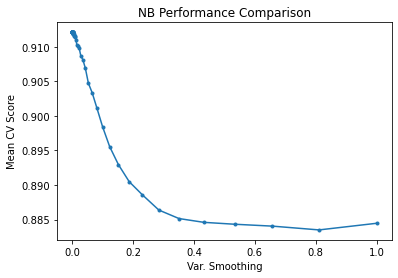

In [31]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [32]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.9155045118949959


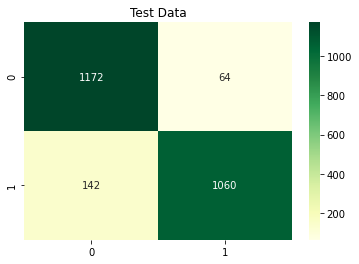

In [33]:
sns.heatmap((confusion_matrix(y_test,predict_test)),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data');

#### Count of misclassifications = 142+64 = 206

#### Naive Bayes Classifier :
#### Accuracy without hyperparameter tuning = 89.78
#### Accuracy after hyperparameter tuning = 91.55

# Insights :

#### We have performed different classification models with and without using GridSearchCV.
#### The below models are giving 100 % accuracy :
#### 1) SVM Classifier
#### 2) Random Forest Classifier
#### 3) KNN Classifier
#### Hence, any of the above three models can be used to predict whether the mushroom is edible or poisonous.